<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Nombre de la Practica: Validación, Evaluación y Selección

Nombre: Jose Daniel Isidoro Reyes

Matrícula:261552

Fecha: 11/11/2025

# 1) Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

In [1]:
# Carga de librerías
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Configuración de opciones de visualización
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

try:
  from ucimlrepo import fetch_ucirepo
except:
  !pip install ucimlrepo
  from ucimlrepo import fetch_ucirepo

# Carga del conjunto de datos
glioma_grading_clinical_and_mutation_features =  fetch_ucirepo(id = 759)

X =  glioma_grading_clinical_and_mutation_features.data.features
y =  glioma_grading_clinical_and_mutation_features.data.targets
df =  pd.concat([X, y], axis  =  1)

print("---Impresión de primeras filas---")
df.head()

---Impresión de primeras filas---


,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,0,51.30,white,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,38.72,white,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,35.17,white,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,32.78,white,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,31.51,white,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 2) Análisis Exploratorio de Datos (EDA)

## Describir forma y estructura (shape, describe(), info()).



In [2]:
# Impresión de forma y estructura del conjunto de datos
filas, columnas =  df.shape
print(f"El conjunto de datos tiene {filas} filas y {columnas} columnas.")

El conjunto de datos tiene 839 filas y 24 columnas.


In [3]:
# Información general del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            839 non-null    int64  
 1   Age_at_diagnosis  839 non-null    float64
 2   Race              839 non-null    object 
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

<p align = "justify"

Como se puede observar la estructura del conjunto de datos es correcta. Esto es, no hay columnas con valores faltantes, y todas las columnas tienen el tipo de dato esperado, con excepción de la columna Race que está etiquetada incorrectamente como texto en lugar de categorico.

In [4]:
# Aplicación de One-Hot Encoding a Race
df = pd.get_dummies(df, columns=["Race"], drop_first=True)


In [5]:
# Impresión de estadística descriptiva
df.describe()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.418355,50.935411,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,0.087008,0.079857,0.064362,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222,0.419547
std,0.493583,15.702339,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,0.282015,0.271233,0.245544,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889,0.493779
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Histogramas para columnas númericas

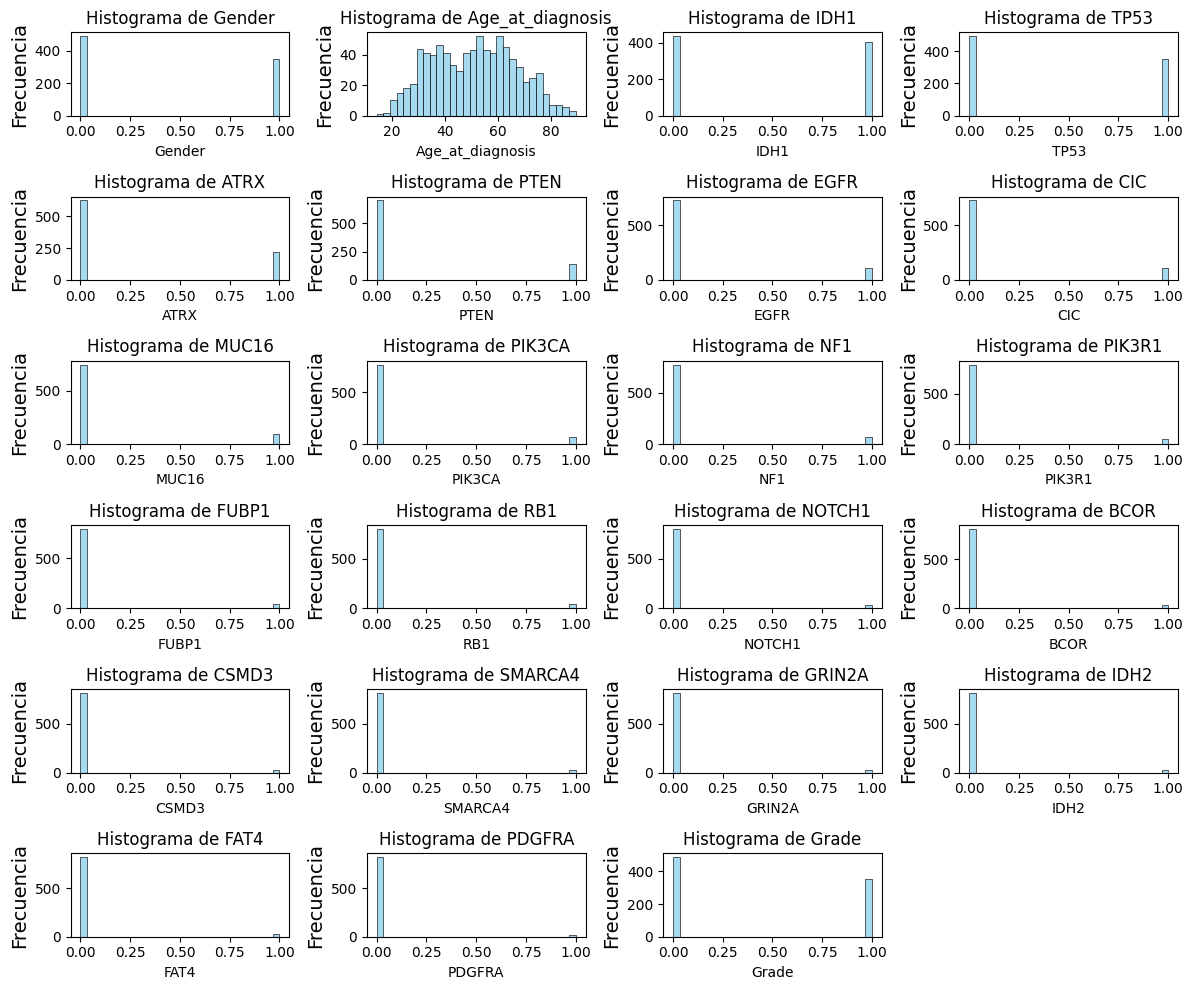

In [6]:
# Selección de columnas númericas
columnas_numericas =  df.select_dtypes(include = "number").columns

# Creación de Histogramas para cada columna
plt.figure(figsize = (12, 10))
for i, col in enumerate(columnas_numericas, 1 ):
  plt.subplot(6, 4, i)
  sns.histplot(df[col], kde = False, bins =  30, color = "skyblue")
  plt.title(f"Histograma de {col}", fontsize = 12)
  plt.xlabel(col, fontsize = 10)
  plt.ylabel("Frecuencia", fontsize = 14)

plt.tight_layout()
plt.show()

## Violin Plots

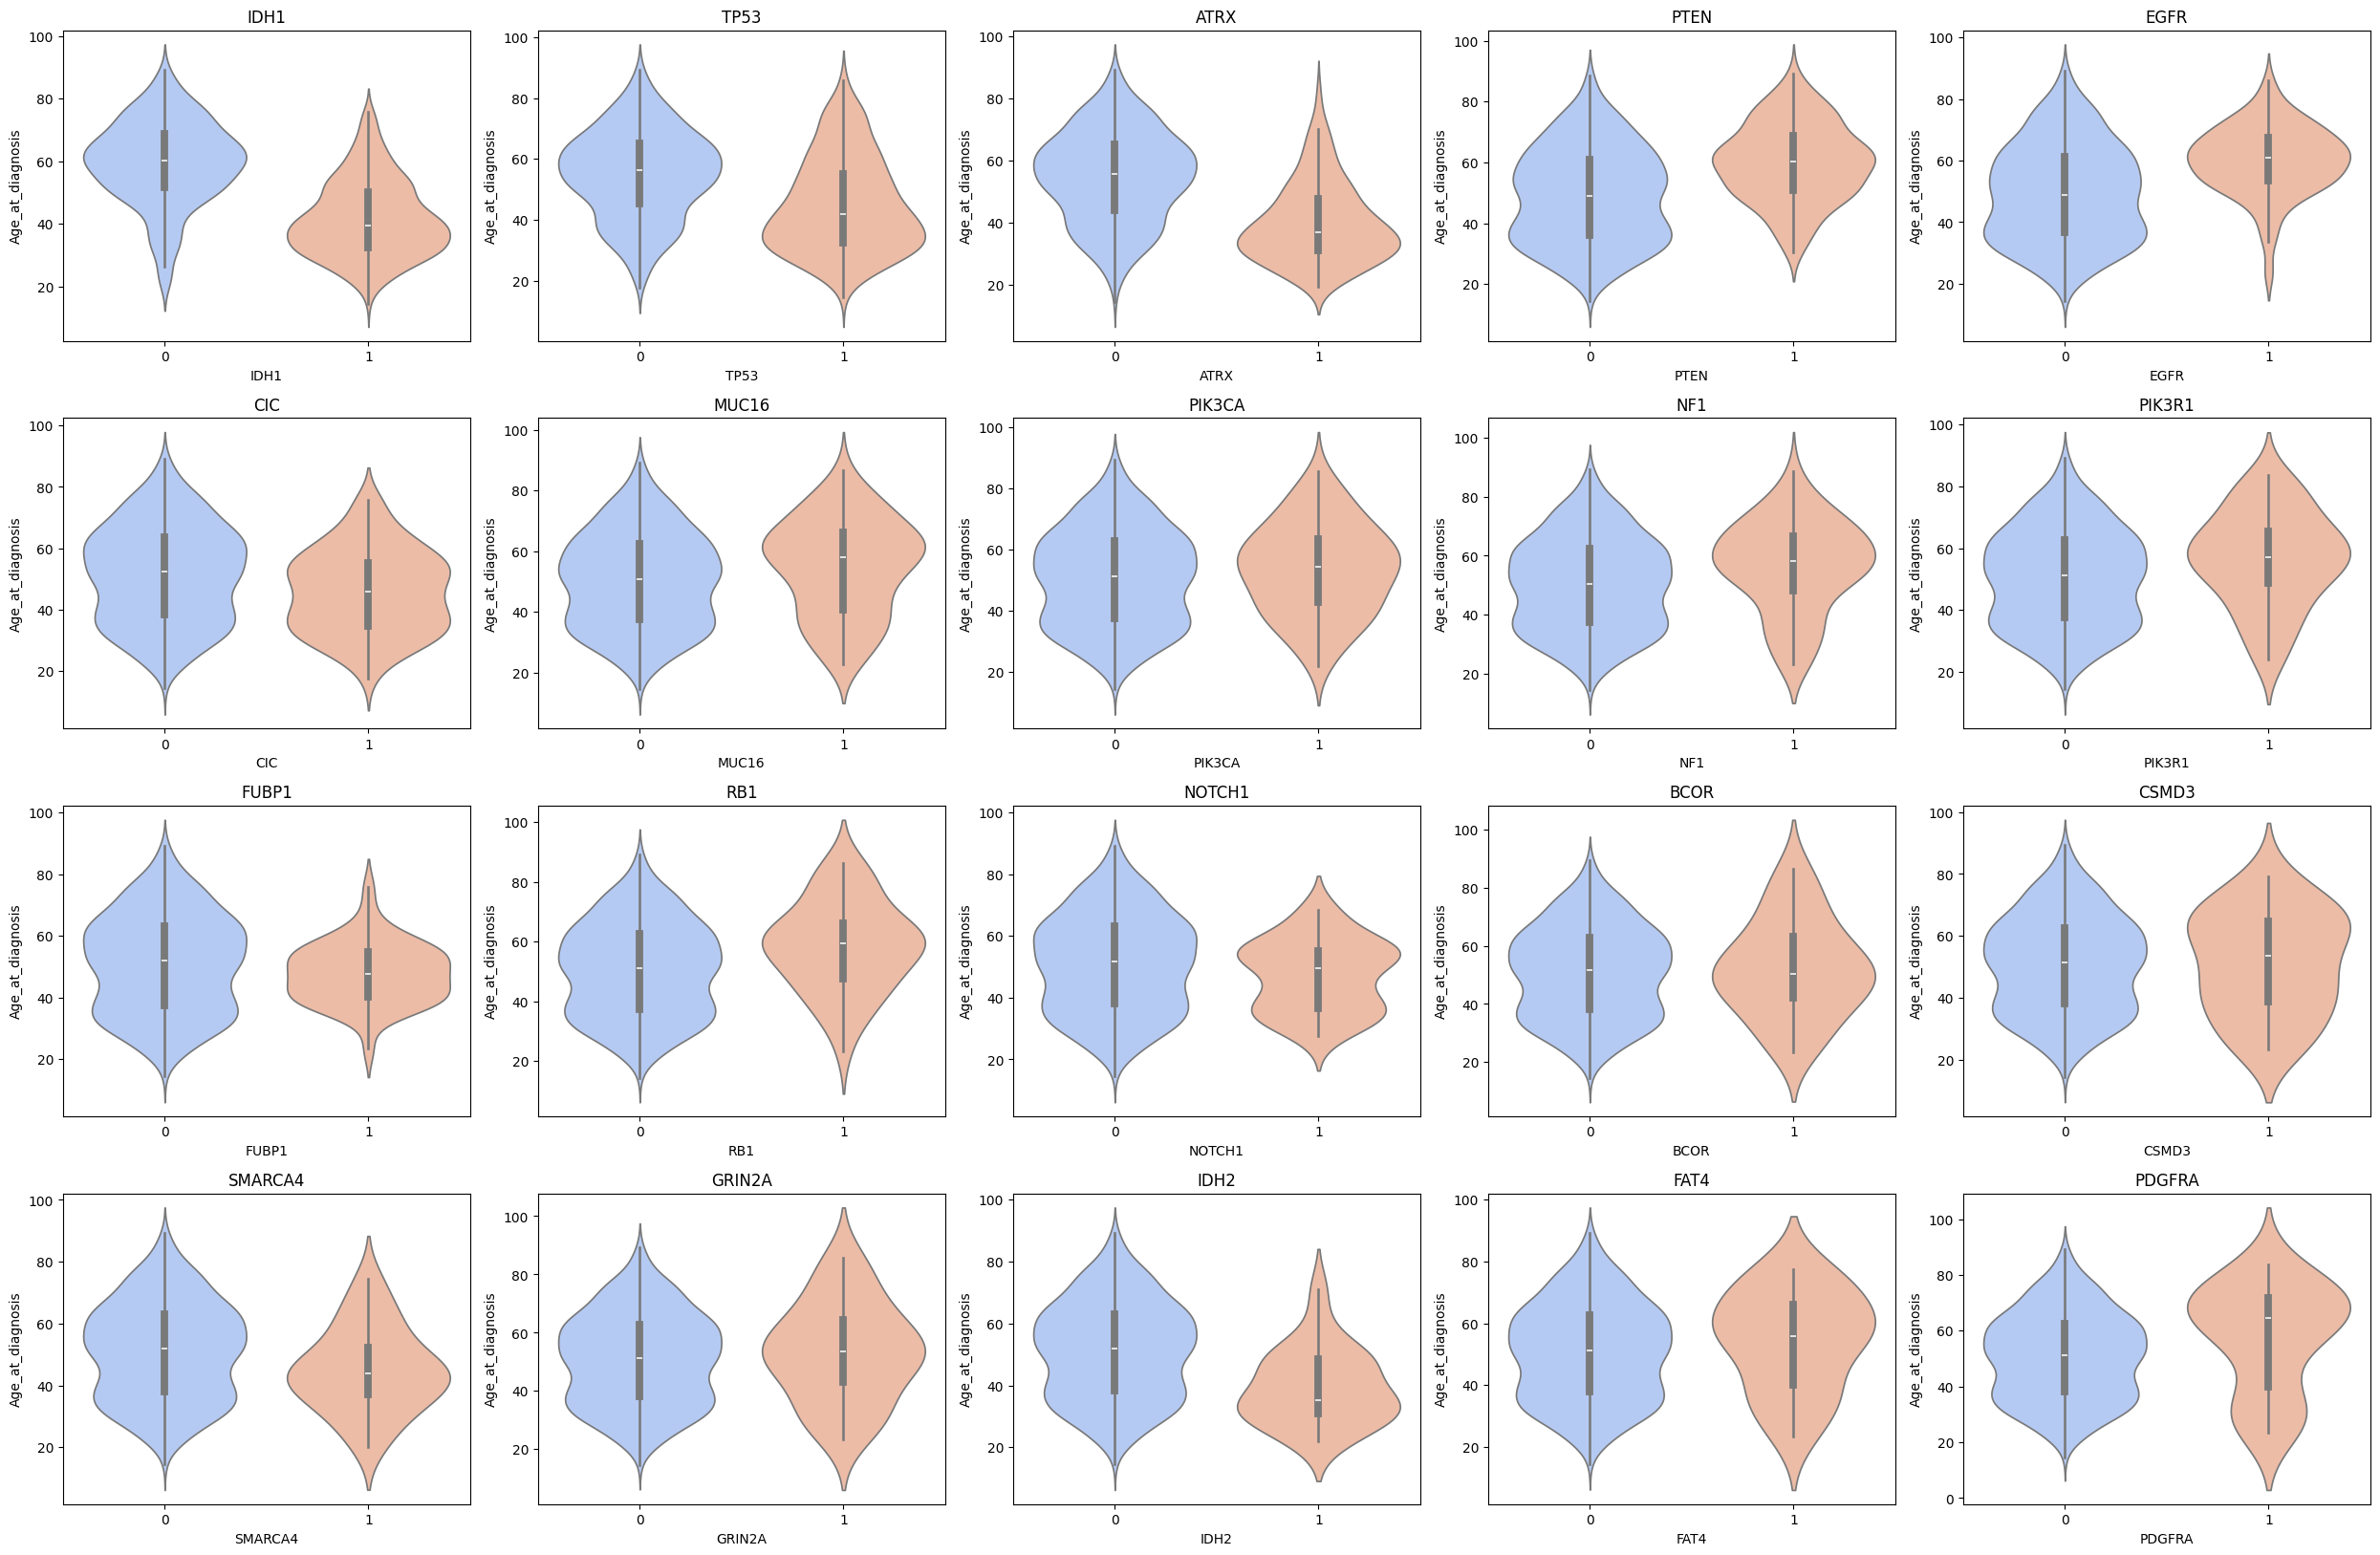

In [7]:
mutaciones = [
    col for col in df.columns  if df[col].dtype in ["int64", "float64"] and df[col].nunique() ==  2 and col not in["Gender", "Grade"]
]

n = len(mutaciones)
cols = 5
rows = (n // cols)  + 1

plt.figure(figsize = (5 * cols, 4 *  rows))

for i, col in enumerate(mutaciones):
  plt.subplot(rows, cols, i + 1)
  sns.violinplot(data = df, x =  col, y = "Age_at_diagnosis", palette = 'coolwarm')
  plt.title(col)
  plt.tight_layout()

# Matriz de Correlaciones

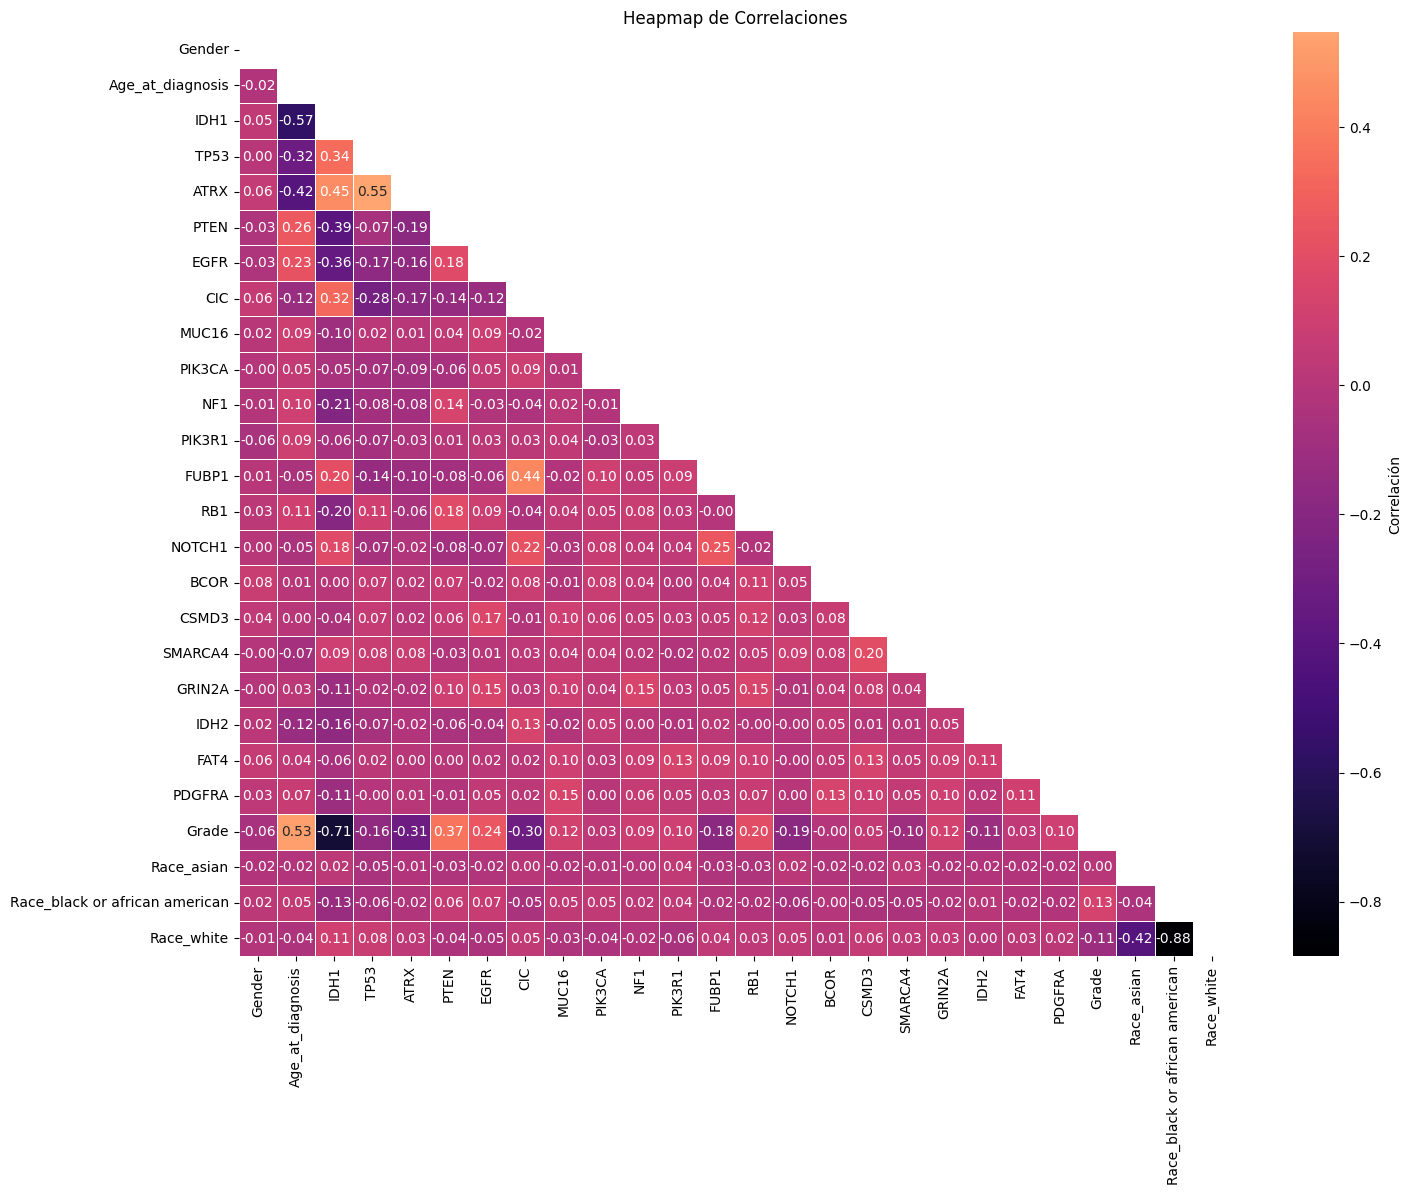

In [8]:
# Matriz de correlaciones
corr =  df.corr().select_dtypes(include = ["number"])

# Filtro para mostrar la parte inferior de la matríz de correlaciones
mask  =  np.triu(np.ones_like(corr, dtype = bool))


plt.figure(figsize = (16, 12))
sns.heatmap(corr,
            mask =  mask,
            cmap =  "magma",
            annot = True,
            fmt = ".2f",
            linewidths = 0.5,
            center = 0,
            cbar_kws = {'label': 'Correlación'}
            )
plt.title("Heapmap de Correlaciones")
plt.show()

## Preguntas

¿Existen clases desbalanceadas?

¿Qué atributos parecen más informativos?

In [9]:
df

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade,Race_asian,Race_black or african american,Race_white
0,0,51.30,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,False,False,True
1,0,38.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
2,0,35.17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
3,1,32.78,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,False,False,True
4,0,31.51,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,77.89,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True
835,0,85.18,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True
836,1,77.49,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True
837,0,63.33,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,False,True


## 3. Gráfica de Errores de Entranamiento y Prueba

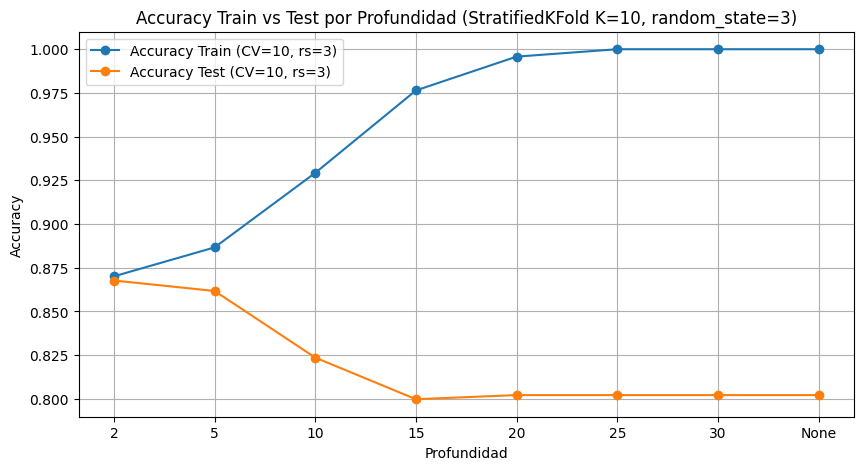

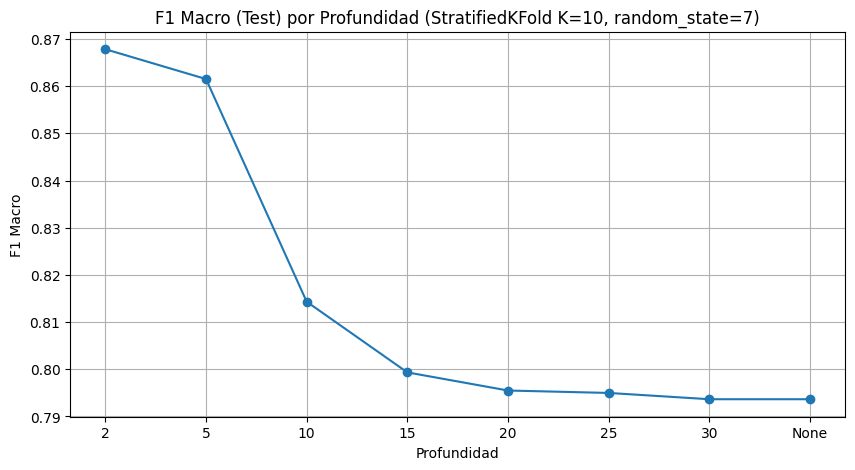

In [10]:
X = df.drop("Grade", axis=1)
y = df["Grade"]

depths = [2, 5, 10, 15, 20, 25, 30, None]

cv_acc = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)
cv_f1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

train_acc = []
test_acc = []
f1_macro_test = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    acc_scores = cross_validate(clf, X, y, cv=cv_acc, scoring="accuracy", return_train_score=True, n_jobs=-1)
    train_acc.append(acc_scores["train_score"].mean())
    test_acc.append(acc_scores["test_score"].mean())
    f1_scores = cross_val_score(clf, X, y, cv=cv_f1, scoring="f1_macro", n_jobs=-1)
    f1_macro_test.append(f1_scores.mean())

labels = [str(d) for d in depths]

plt.figure(figsize=(10, 5))
plt.plot(labels, train_acc, marker="o", label="Accuracy Train (CV=10, rs=3)")
plt.plot(labels, test_acc, marker="o", label="Accuracy Test (CV=10, rs=3)")
plt.xlabel("Profundidad")
plt.ylabel("Accuracy")
plt.title("Accuracy Train vs Test por Profundidad (StratifiedKFold K=10, random_state=3)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(labels, f1_macro_test, marker="o", label="F1 Macro Test (CV=10, rs=7)")
plt.xlabel("Profundidad")
plt.ylabel("F1 Macro")
plt.title("F1 Macro (Test) por Profundidad (StratifiedKFold K=10, random_state=7)")
plt.grid(True)
plt.show()



## Optimización de hiperparámetros con RandomizedSearchCV

In [11]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, test_size =  0.3, random_state =  42, stratify = y)



# Definir el modelo base
clf =  DecisionTreeClassifier(random_state = 42)

# Definir el espacio de búsqueda de hiperparametros
random_grid  =  {
    "criterion": ["gini", "entropy"],
    "max_depth": randint(low =  5, high =  51),
    "min_samples_split": randint(low =  2, high =  21)
}

# Stratified
cv =  StratifiedKFold(n_splits =  5, shuffle  =  True, random_state =  42)

# Configuracíon de búsqueda aleatoria
random_search =  RandomizedSearchCV(
    estimator =  clf,
    param_distributions =  random_grid,
    n_iter =  5
)

random_search.fit(X_train, y_train )
#  Resultados
print("Mejores hiperparametros encontrados:", random_search.best_params_)
print("Mejor exactitud promedio (Stratified):", random_search.best_score_)

Mejores hiperparametros encontrados: {'criterion': 'entropy', 'max_depth': 43, 'min_samples_split': 8}
Mejor exactitud promedio (Stratified): 0.8314790670722875


# Optimización de Hiperparametros con GridSearch

In [15]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
clf  =  DecisionTreeClassifier(random_state = 42)

# Definir el espacio de búsqueda de hiperparametros
param_grid  =  {
    "criterion":  ["gini", "entropy"],
    "max_depth": range(5, 51, 5),
    "min_samples_split": range(2, 21, 1)
}

# Stratified
cv =  StratifiedKFold(n_splits = 10, shuffle  =  True, random_state =  42 )

# Configurar GridSearch con Stratified
grid_search  =  GridSearchCV(estimator =  clf, param_grid =  param_grid, cv =  cv, scoring =  "f1_macro", n_jobs  =  -1)

# Ajustar el modelo
grid_search.fit(X, y)

# Resultados
print("Mejores hiperparametros encontrados:", grid_search.best_params_)
print("Mejor exactitud promedio (Stratified):", grid_search.best_score_)


Mejores hiperparametros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 11}
Mejor exactitud promedio (Stratified): 0.8641181174929005


## Optimización de hiperparametros con RandomizedSearchCV: Accuracy

In [16]:
# Definir modelo base
clf  =  DecisionTreeClassifier(random_state =  42)

# Definir espacio de búsqueda
param_dist =  {
    "criterion": ["gini", "entropy"],
    "max_depth": range(5, 51, 1),
    "min_samples_split": range(2, 20, 1)
}

# Configurar validación cruzada estratificada
cv =  StratifiedKFold(n_splits =  10, shuffle  =  True, random_state = 42)

# Configurar búsqueda aleatoria
random_search =  RandomizedSearchCV(
    estimator =  clf,
    param_distributions =  param_dist,
    n_iter =  5,
    cv = cv,
    scoring  = "accuracy",
    random_state =  42,
    n_jobs =  -1
)

# Ajusta  el modelo
random_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparametros encontrados:", random_search.best_params_)
print("Precision en test:", accuracy_score(y_test, random_search.predict(X_test)))

Mejores hiperparametros encontrados: {'min_samples_split': 16, 'max_depth': 6, 'criterion': 'entropy'}
Precision en test: 0.8412698412698413


# Optimización de hiperparametros con GridSearchCV: accuracy

In [17]:
# Definir el modelo base
clf  =  DecisionTreeClassifier(random_state =  42)

# Definir el espacio de búsqueda de hiperparametros
param_grid =  {
    "criterion": ["gini", "entropy"],
    "max_depth": range(5, 51, 1),
    "min_samples_split": range(2, 20, 1)
}

# Stratified
cv =  StratifiedKFold(n_splits = 10,  shuffle  =  True, random_state =  42)

# Configurar GridSearchCV con Stratified
grid_search =  GridSearchCV(estimator  =  clf, param_grid  =  param_grid, cv =  cv, scoring =  "f1_macro", n_jobs =  -1)

# Ajustar el modelo
grid_search.fit(X, y)

# Resultados
print("Mejores hiperparametros encontrados:", grid_search.best_params_)
print("Mejor exactitud promedio (Stratified):", grid_search.best_score_)

Mejores hiperparametros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 11}
Mejor exactitud promedio (Stratified): 0.8641181174929005


# 8) Actividad de reflexión y análisis

¿Cuál método encontró mejores hiperparámetros?

¿Cuál fue más costoso computacionalmente?

¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?

¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?

¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?